In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import median

# conjuntos de entrenamiento y prueba
from sklearn.model_selection import train_test_split

# kmeans
from sklearn.cluster import KMeans

# librerias para modelos
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [2]:
# lectura de datos
datos = pd.read_excel("C:/Users/brand/Downloads/case_ds_globant/publish-spend-july-2016.xls")

In [3]:
datos.head()

,TRANS DATE,TRANS VAT DESC,ORIGINAL GROSS AMT,MERCHANT NAME,CARD NUMBER,TRANS CAC CODE 1,TRANS CAC DESC 1,TRANS CAC CODE 2,TRANS CAC DESC 2,TRANS CAC CODE 3,Directorate
0,2016-07-21,VR,11.79,w m morrison plc,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
1,2016-07-22,VR,30.66,shell kings 587,************5770,K020,Vehicle Fuel,RV12N,African-Caribbean DC,A00,Adult & Communities
2,2016-07-19,VR,52.59,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
3,2016-07-26,VR,50.50,tex sussex sstn,************8738,K020,Vehicle Fuel,RV12T,"Shakti Elders Dce, 73 Conybere St, B12",A00,Adult & Communities
4,2016-07-13,VR,50.00,meridian service s,************5804,K020,Vehicle Fuel,RVA12,Enablement Tyburn Rd,A00,Adult & Communities


# LIMPIEZA DE LOS DATOS

In [4]:
# Renombre de las columnas
original_columns = datos.columns
renamed_columns = {}
for col in original_columns:
    name = col.lower()
    name = name.replace(' ', '_')
    renamed_columns[col] = name

datos = datos.rename(columns = renamed_columns)

In [5]:
# limpieza del dataframe
columns = ["trans_vat_desc", "original_gross_amt", "trans_cac_code_1", "trans_cac_code_2", "directorate"]

df = datos[columns]
df = df.dropna()
df = df.fillna(0)

In [6]:
# exploración de los datos
print("number of different trans_vat_desc: \t", len(df["trans_vat_desc"].unique()))
print("number of different trans_cac_code_1: \t", len(df["trans_cac_code_1"].unique()))
print("number of different trans_cac_code_2: \t", len(df["trans_cac_code_2"].unique()))
print("number of different directorate: \t", len(df["directorate"].unique()))

number of different trans_vat_desc: 	 6
number of different trans_cac_code_1: 	 76
number of different trans_cac_code_2: 	 451
number of different directorate: 	 11


In [7]:
# mapear trans_vat_desc
map_trans_vat_desc = {}
for number, item in enumerate(df["trans_vat_desc"].unique()):
    map_trans_vat_desc[item] = float(number + 1)

df["trans_vat_desc"] = df["trans_vat_desc"].map(map_trans_vat_desc)

In [8]:
# mapear trans_cac_code_1
map_trans_cac_code_1 = {}
for number, item in enumerate(df["trans_cac_code_1"].unique()):
    map_trans_cac_code_1[item] = float(number + 1)

df["trans_cac_code_1"] = df["trans_cac_code_1"].map(map_trans_cac_code_1)

In [9]:
# mapear trans_cac_code_2
map_trans_cac_code_2 = {}
for number, item in enumerate(df["trans_cac_code_2"].unique()):
    map_trans_cac_code_2[item] = float(number + 1)

df["trans_cac_code_2"] = df["trans_cac_code_2"].map(map_trans_cac_code_2)

In [10]:
# mapear directorate
df["directorate"].unique()
map_directorate = {
    "Adult & Communities": "Adults & Communities",
    "Adults & Communities": "Adults & Communities",
    "Corporate Resources": "Corporate Resources",
    "CYO&F": "CYP&F",
    "CYP&F": "CYP&F",
    "CYP&F SCHOOLS": "CYP&F",
    "DEVELOPMENT": "Development",
    "Local Services": "Local Services"
}

In [11]:
df["directorate"] = df["directorate"].map(map_directorate)

In [12]:
df.head()

,trans_vat_desc,original_gross_amt,trans_cac_code_1,trans_cac_code_2,directorate
0,1.0,11.79,1.0,1.0,Adults & Communities
1,1.0,30.66,1.0,1.0,Adults & Communities
2,1.0,52.59,1.0,2.0,Adults & Communities
3,1.0,50.50,1.0,2.0,Adults & Communities
4,1.0,50.00,1.0,3.0,Adults & Communities


In [13]:
# normalizar las cantidades
min_amount = min(df["original_gross_amt"])
max_amount = max(df["original_gross_amt"])
print("max_amount: \t", max_amount)
print("min_amount: \t", min_amount)

normalized_df = df.copy()
normalized_df["original_gross_amt"] = (normalized_df["original_gross_amt"] - min_amount)/ (max_amount - min_amount)

max_amount: 	 66215.46
min_amount: 	 -2775.82


# Visualización de los datos para encontrar patrones

<AxesSubplot:xlabel='trans_vat_desc', ylabel='original_gross_amt'>

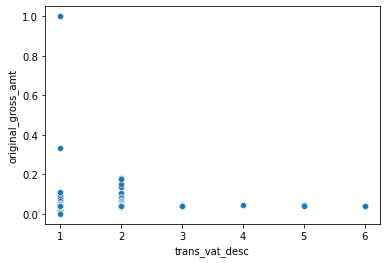

In [14]:
sns.scatterplot(x='trans_vat_desc', y='original_gross_amt', data=normalized_df)

<AxesSubplot:xlabel='trans_vat_desc', ylabel='original_gross_amt'>

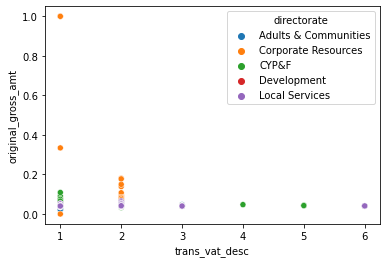

In [15]:
sns.scatterplot(x='trans_vat_desc', y='original_gross_amt', hue='directorate', data=normalized_df)

<AxesSubplot:xlabel='trans_cac_code_1', ylabel='original_gross_amt'>

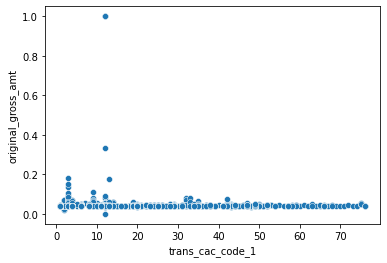

In [16]:
sns.scatterplot(x='trans_cac_code_1', y='original_gross_amt', data=normalized_df)

<AxesSubplot:xlabel='trans_cac_code_1', ylabel='original_gross_amt'>

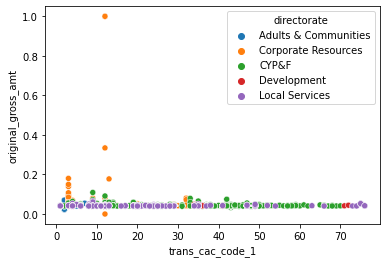

In [17]:
sns.scatterplot(x='trans_cac_code_1', y='original_gross_amt', hue='directorate', data=normalized_df)

<AxesSubplot:xlabel='trans_cac_code_1', ylabel='trans_cac_code_2'>

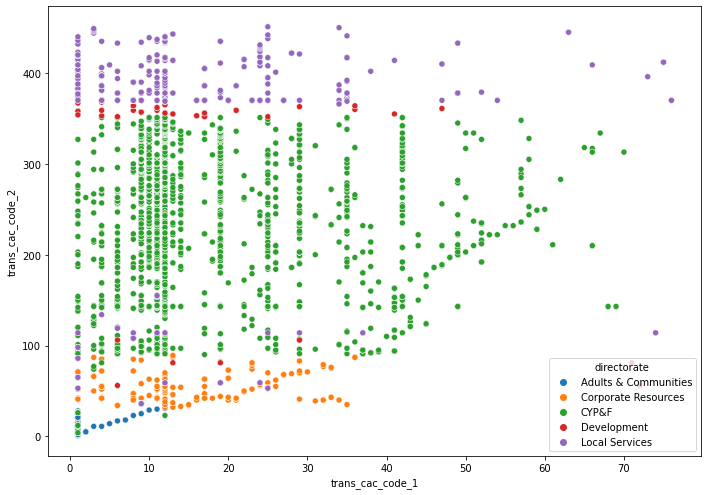

In [18]:
# parametros para seaborn 
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.scatterplot(ax=ax, x='trans_cac_code_1', y='trans_cac_code_2', hue='directorate', data=normalized_df)

## Comentarios:
#### De la visualización de los datos entre la variable "original_gross_amt" con "trans_vat_desc" y "trans_cac_code_1" pueden observarse tendencias en las cantidades y transacciones comunes. 
#### Puede observarse que las cantidades rondan entre un rango de valores común, mientras que son casos aislados los que exceden este rango común. Probablemente, pudiéramos hacer una detección de transacciones fraudulentas obteniendo la media o mediana de montos asociados a cada "trans_vat_desc" y "trans_cac_code_1", y en caso de observar una cantidad alejada de la media o mediana (posiblemente valores outliers de un diagrama de caja) podríamos hablar de una transacción fraudulenta o de cuidado. 

#### Del proceso de clusterización, se puede observar una relación que existe entre las variables "trans_cac_code_1" y "trans_cac_code_2". Las transacciones por área (directorate) están relacionadas entre mismos grupos de transacciones, por lo que se puede hacer un mapeo de nuevas transacciones e identificar transacción origen (trans_cac_code_1) y transacción destino (trans_cac_code_1) y tomar la decisión sobre si es una transacción válida o puede ser una transacción fraudulenta. 

# Creación de clusters automática

In [19]:
prediction_df = normalized_df.copy()

map_directorate = {
    "Adults & Communities": 1,
    "Corporate Resources": 2,
    "CYP&F": 3,
    "Development": 4,
    "Local Services": 5,
}

prediction_df["directorate"] = prediction_df["directorate"].map(map_directorate)
prediction_df.head()

,trans_vat_desc,original_gross_amt,trans_cac_code_1,trans_cac_code_2,directorate
0,1.0,0.040405,1.0,1.0,1.0
1,1.0,0.040679,1.0,1.0,1.0
2,1.0,0.040997,1.0,2.0,1.0
3,1.0,0.040966,1.0,2.0,1.0
4,1.0,0.040959,1.0,3.0,1.0


In [20]:
columns = prediction_df.columns.drop("directorate")
X = prediction_df[columns]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
pca_df = pd.DataFrame(X_pca)
pca_df.columns = ['PC1', 'PC2']

In [21]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300)
y_km = km.fit_predict(X)

In [22]:
clusters_df = prediction_df.copy()
clusters_df['cluster'] = y_km
pca_df['cluster'] = y_km
pca_df['clase'] = prediction_df['directorate']

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

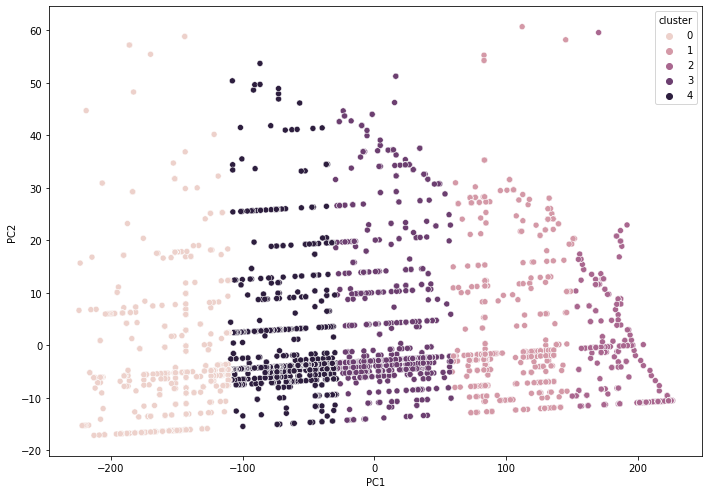

In [23]:
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'cluster', data = pca_df)

<AxesSubplot:xlabel='PC1', ylabel='PC2'>

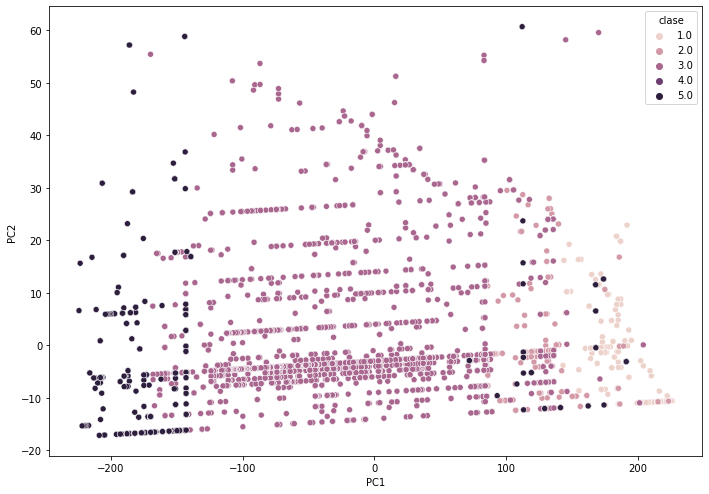

In [24]:
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.scatterplot(x = 'PC1', y = 'PC2', hue = 'clase', data = pca_df)

In [25]:
clusters_df.to_csv("C:/Users/brand/Downloads/case_ds_globant/clusters_result.csv")

In [26]:
new_df = pd.DataFrame(prediction_df[["trans_cac_code_1", "trans_cac_code_2"]])

In [27]:
km = KMeans(n_clusters=5, init='k-means++', n_init=10, max_iter=300, tol=0.001)
y_km = km.fit_predict(new_df)

In [28]:
new_df['cluster'] = y_km

<AxesSubplot:xlabel='trans_cac_code_1', ylabel='trans_cac_code_2'>

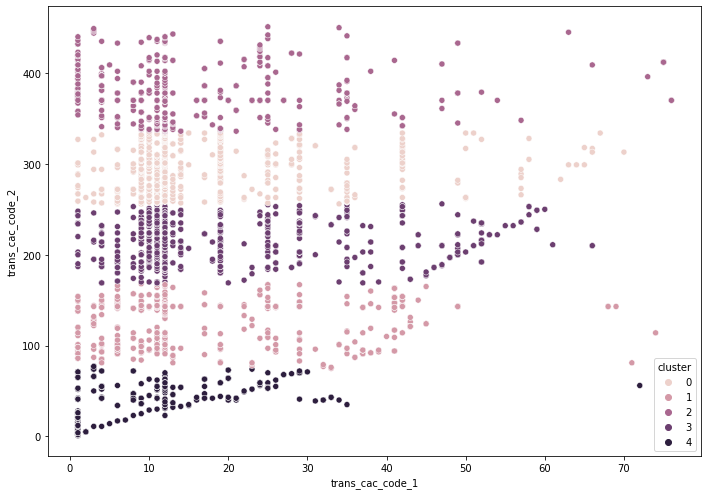

In [29]:
dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=dims)
sns.scatterplot(ax=ax, x = 'trans_cac_code_1', y = 'trans_cac_code_2', hue = 'cluster', data = new_df)

## Comentarios:

#### Se intentó la creación automática de clústers haciendo un mapeo de las variables a dos dimensiones con ayuda de PCA, sin embargo la definición de los clusters más pequeños de la etapa anterior toman más dimensión en la etapa de la creación automática de los nuevos clústers, por lo que no se logra establecer una relación correcta. Sin embargo, puede observarse que la similitud entre clusters es un poco similar, por lo que posiblemente hace falta incrementar los datos para correcta generación de clústers o balancear los datos para generar asociaciones más precisas. 

In [30]:
prediction_df.head()

,trans_vat_desc,original_gross_amt,trans_cac_code_1,trans_cac_code_2,directorate
0,1.0,0.040405,1.0,1.0,1.0
1,1.0,0.040679,1.0,1.0,1.0
2,1.0,0.040997,1.0,2.0,1.0
3,1.0,0.040966,1.0,2.0,1.0
4,1.0,0.040959,1.0,3.0,1.0


In [31]:
prediction_df = prediction_df.dropna()

In [32]:
# crear sets de entrenamiento y prueba
y_column = "original_gross_amt"
columns = prediction_df.columns.drop(y_column)
train, test = train_test_split(prediction_df, test_size=0.2)

In [33]:
x_train = train[columns]
y_train = train[y_column]
print("Size of x_train: \t", len(x_train))
print("Size of y_train: \t", len(y_train))

Size of x_train: 	 3855
Size of y_train: 	 3855


In [34]:
x_test = test[columns]
y_test = test[y_column]
print("Size of x_test: \t", len(x_test))
print("Size of y_test: \t", len(y_test))

Size of x_test: 	 964
Size of y_test: 	 964


In [35]:
# modelo LinearRegression
multivariate_regression = LinearRegression()
res = multivariate_regression.fit(x_train, y_train)

In [36]:
coef = res.coef_
intercept = res.intercept_

In [37]:
print('coef: \t', coef)
print('intercept: \t', intercept)

coef: 	 [-2.74707418e-04  3.23010480e-06 -2.01771857e-06 -5.30671945e-04]
intercept: 	 0.04442671839599397


In [52]:
# Create new dataframe of column'Predicted Price'
y_hat = pd.DataFrame(res.predict(x_test), columns=['gross_amt_predicted']) 
actual_y = pd.DataFrame(y_test, columns=['original_gross_amt'])
actual_y = actual_y.reset_index(drop=True)
df_actual_vs_predicted = pd.concat([actual_y, y_hat], axis=1)

In [55]:
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
original_gross_amt,0.040542,0.040625,0.048216,0.040335,0.040463,0.040379,0.040320,0.040890,0.041596,0.041369,...,0.041990,0.048877,0.040301,0.042891,0.040814,0.040437,0.040272,0.045998,0.040788,0.040315
gross_amt_predicted,0.041684,0.040687,0.042048,0.042298,0.041799,0.042932,0.041927,0.040735,0.041830,0.041895,...,0.042013,0.043618,0.042117,0.041740,0.040731,0.041679,0.040817,0.041987,0.041908,0.041765


## Comentarios:

##### Implementando un modelo de regresión multivariable para la predicción de valores NORMALIZADOS de "original_gross_amt" con base en los códigos de transacción, se puede obtener un resultado bastante cercano a los valores reales. 

In [56]:
map_directorate = {
    "Adults & Communities": 1,
    "Corporate Resources": 2,
    "CYP&F": 3,
    "Development": 4,
    "Local Services": 5,
}

df["directorate"] = df["directorate"].map(map_directorate)
df.head()

,trans_vat_desc,original_gross_amt,trans_cac_code_1,trans_cac_code_2,directorate
0,1.0,11.79,1.0,1.0,1.0
1,1.0,30.66,1.0,1.0,1.0
2,1.0,52.59,1.0,2.0,1.0
3,1.0,50.50,1.0,2.0,1.0
4,1.0,50.00,1.0,3.0,1.0


In [60]:
df = df.dropna()
df = df.fillna(0)

In [61]:
# crear sets de entrenamiento y prueba
y_column = "original_gross_amt"
columns = df.columns.drop(y_column)
train, test = train_test_split(df, test_size=0.2)

In [62]:
x_train = train[columns]
y_train = train[y_column]
print("Size of x_train: \t", len(x_train))
print("Size of y_train: \t", len(y_train))

Size of x_train: 	 3855
Size of y_train: 	 3855


In [63]:
x_test = test[columns]
y_test = test[y_column]
print("Size of x_test: \t", len(x_test))
print("Size of y_test: \t", len(y_test))

Size of x_test: 	 964
Size of y_test: 	 964


In [64]:
# modelo LinearRegression
multivariate_regression = LinearRegression()
res = multivariate_regression.fit(x_train, y_train)

In [65]:
coef = res.coef_
intercept = res.intercept_

In [66]:
print('coef: \t', coef)
print('intercept: \t', intercept)

coef: 	 [-42.49108888   0.48382557  -0.28400094 -45.21905001]
intercept: 	 400.64727415918856


In [67]:
# Crear nuevo dataframe para la columna 'gross_amt_predicted'
y_hat = pd.DataFrame(res.predict(x_test), columns=['gross_amt_predicted']) 
actual_y = pd.DataFrame(y_test, columns=['original_gross_amt'])
actual_y = actual_y.reset_index(drop=True)
df_actual_vs_predicted = pd.concat([actual_y, y_hat], axis=1)

In [68]:
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
original_gross_amt,30.66000,260.000000,80.000000,354.000000,200.000000,5.520000,398.590000,60.000000,176.430000,68.880000,...,29.100000,44.00000,24.000000,44.200000,3.290000,19.990000,34.070000,39.200000,51.75000,39.490000
gross_amt_predicted,313.13696,198.737372,21.247865,151.845745,93.166603,109.701602,122.081995,137.498578,144.777194,310.580951,...,88.317355,310.01295,151.056687,183.937852,104.568352,157.582112,121.229992,145.201719,109.67013,307.456941


## Comentarios:

#### Implementando un modelo de regresión multivariable para la predicción de valores SIN NORMALIZAR de "original_gross_amt" con base en los códigos de transacción, se obtiene un resultado pobre para la predicción de los valores reales. 

In [69]:
# modelo Lasso
lasso = Lasso()
res_lasso = lasso.fit(x_train, y_train)

In [70]:
# Crear nuevo dataframe para la columna 'gross_amt_predicted'
y_hat = pd.DataFrame(res_lasso.predict(x_test), columns=['gross_amt_predicted']) 
actual_y = pd.DataFrame(y_test, columns=['original_gross_amt'])
actual_y = actual_y.reset_index(drop=True)
df_actual_vs_predicted = pd.concat([actual_y, y_hat], axis=1)

In [71]:
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
original_gross_amt,30.660000,260.000000,80.000000,354.000000,200.000000,5.520000,398.590000,60.000000,176.430000,68.880000,...,29.100000,44.000000,24.000000,44.200000,3.290000,19.990000,34.070000,39.200000,51.750000,39.490000
gross_amt_predicted,309.958119,198.746568,21.160597,149.025397,93.272818,110.517502,123.807703,134.050432,141.329086,307.238343,...,87.704848,306.633949,147.836047,183.173689,104.647335,161.582362,122.901111,148.292162,110.658881,303.914173


In [73]:
# crear sets de entrenamiento y prueba
y_column = "original_gross_amt"
columns = prediction_df.columns.drop(y_column)
train, test = train_test_split(prediction_df, test_size=0.2)

In [74]:
x_train = train[columns]
y_train = train[y_column]
print("Size of x_train: \t", len(x_train))
print("Size of y_train: \t", len(y_train))

Size of x_train: 	 3855
Size of y_train: 	 3855


In [75]:
x_test = test[columns]
y_test = test[y_column]
print("Size of x_test: \t", len(x_test))
print("Size of y_test: \t", len(y_test))

Size of x_test: 	 964
Size of y_test: 	 964


In [76]:
# modelo Lasso
lasso = Lasso()
res_lasso = lasso.fit(x_train, y_train)

In [77]:
# Crear nuevo dataframe para la columna 'gross_amt_predicted'
y_hat = pd.DataFrame(res_lasso.predict(x_test), columns=['gross_amt_predicted']) 
actual_y = pd.DataFrame(y_test, columns=['original_gross_amt'])
actual_y = actual_y.reset_index(drop=True)
df_actual_vs_predicted = pd.concat([actual_y, y_hat], axis=1)

In [78]:
df_actual_vs_predicted.T

,0,1,2,3,4,5,6,7,8,9,...,954,955,956,957,958,959,960,961,962,963
original_gross_amt,0.043858,0.040721,0.040814,0.041365,0.040590,0.042153,0.040865,0.040939,0.040255,0.040278,...,0.040510,0.041172,0.040349,0.041597,0.041914,0.040524,0.040944,0.040792,0.041285,0.040669
gross_amt_predicted,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213,...,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213,0.042213


## Comentarios:

#### Se puede observar que el desempeño de un modelo Lasso ante valores no normalizados para la variable "original_gross_amount" es igual de pobre en la predicción que un modelo LinearRegression. Sin embargo, usando valores normalizados para la variable "original_gross_amt" tiene un desempeño mejor, detrás del desempeño que tiene el modelo LinearRegression usando mismos valores normalizados. 